**<訓練データ、テストデータの読み込み>**

※ドライブをマウントすること

メルスペクトログラムを実行する場合はこの下のセルを実行

In [ ]:
import numpy as np

dir = "/content/drive/MyDrive/data/"
train = np.load(dir+"train_mlsp1.npz")
X_train = train["x"]
y_train = train["y"]

test = np.load(dir+"test_mlsp1.npz")
X_test = test["x"]
y_test = test["y"]

input_shape = (128, 1723, 1)

メル周波数ケプストラム係数を実行する場合はこの下のセルを実行

In [ ]:
import numpy as np

dir = "/content/drive/MyDrive/data/"
train = np.load(dir+"train_mfcc1.npz")
X_train = train["x"]
y_train = train["y"]

test = np.load(dir+"test_mfcc1.npz")
X_test = test["x"]
y_test = test["y"]

input_shape = (24, 431, 1)

メルスペクトログラム(画像)を実行する場合はこの下のセルを実行

In [ ]:
import numpy as np

dir = "/content/drive/MyDrive/data/"
train = np.load(dir+"train_mlsp2.npz")
X_train = train["x"]
y_train = train["y"]

test = np.load(dir+"test_mlsp2.npz")
X_test = test["x"]
y_test = test["y"]

input_shape = (96, 128, 3)

メル周波数ケプストラム係数(画像)を実行する場合はこの下のセルを実行

In [ ]:
import numpy as np

dir = "/content/drive/MyDrive/data/"
train = np.load(dir+"train_mfcc2.npz")
X_train = train["x"]
y_train = train["y"]

test = np.load(dir+"test_mfcc2.npz")
X_test = test["x"]
y_test = test["y"]

input_shape = (96, 128, 3)

**<モデルの定義>**

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, Nadam

class_num = 5

inputs = Input(shape=input_shape)

x = Conv2D(32, 3, padding="same", activation="relu")(inputs)
x = Conv2D(32, 3, activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(64, 3, padding="same", activation="relu")(x)
x = Conv2D(32, 3, activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(class_num, activation="softmax")(x)

model = Model(inputs, x)

model.compile(loss="categorical_crossentropy", optimizer=Nadam(), metrics=["accuracy"])

**<モデルの学習>**

In [ ]:
epochs = 50
result = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/50
5/5 [==============================] - 1s 77ms/step - loss: 1.6219 - accuracy: 0.2382 - val_loss: 1.6085 - val_accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 40ms/step - loss: 1.6077 - accuracy: 0.2698 - val_loss: 1.6055 - val_accuracy: 0.2200
Epoch 3/50
5/5 [==============================] - 0s 32ms/step - loss: 1.6102 - accuracy: 0.2038 - val_loss: 1.5935 - val_accuracy: 0.4600
Epoch 4/50
5/5 [==============================] - 0s 32ms/step - loss: 1.5874 - accuracy: 0.3217 - val_loss: 1.5404 - val_accuracy: 0.3800
Epoch 5/50
5/5 [==============================] - 0s 33ms/step - loss: 1.5035 - accuracy: 0.3351 - val_loss: 1.4384 - val_accuracy: 0.4200
Epoch 6/50
5/5 [==============================] - 0s 32ms/step - loss: 1.4075 - accuracy: 0.4095 - val_loss: 1.2430 - val_accuracy: 0.4800
Epoch 7/50
5/5 [==============================] - 0s 32ms/step - loss: 1.2910 - accuracy: 0.4591 - val_loss: 1.1767 - val_accuracy: 0.5600
Epoch 8/50
5/5 [===========

**<結果のプロット>**

ロスのプロット

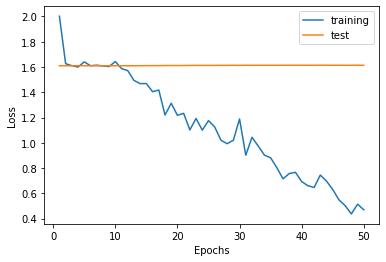

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs+1), result.history['loss'], label="training")
plt.plot(range(1, epochs+1), result.history['val_loss'], label="test")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

精度のプロット

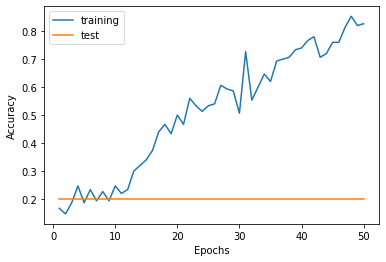

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs+1), result.history['accuracy'], label="training")
plt.plot(range(1, epochs+1), result.history['val_accuracy'], label="test")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()